<a href="https://colab.research.google.com/github/jej0312/DM_TA/blob/main/1_Regression_VariableSelection_RidgeLasso_Chisq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression & Variable Selection & Lasso & Ridge
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: jej_0312_@naver.com

# 0. 시작하기 전에
- 단순 선형 회귀 (simple linear regression): 한 개의 설명 변수에 기반한 경우
- 다중 선형 회귀 (multiple linear regression): 둘 이상의 설명 변수에 기반한 경우
- 선형 회귀 가정  
  1) **선형성**: 예측하고자 하는 종속변수 y와 독립변수 x 간에 선형성을 만족하는 특성을 의미.
    - 비선형 회귀분석에서는 해당하지 않음.
    - 본인이 가진 변수 중 일부가 선형성을 만족하지 않는다면: 1) 다른 새로운 변수를 추가해보거나, 2) 로그, 지수, 루트 등 변수 변환을 취해보는 것, 3) 아예 선형성을 만족하지 않는 변수를 제거하는 것, 4) <u>선형 회귀모델을 만들고 변수 선택법을 통과시키는 것</u> 등 여러 가지 방법이 있음.   

  2) **독립성**: 독립변수 x 간에 상관관계가 없이 독립성을 만족하는 특성을 의미.  
    - 다중 회귀분석에서 중요한 기본가정으로, 단순 회귀분석에서는 해당하지 않음.  
    - 독립성을 위배하는 비슷한 변수가 많이 들어가게 되니 마치 유의하지 않는 것과 같은 결과를 나타낼 수 있으므로 다중공선성, 즉 서로 상관관계가 있다면 이를 제거해주어야 함.
    - 제거하는 방법은: 1) 다중공선성을 일으키는 변수를 제거하거나 (manually OR <u>feature selection</u>), 2) 다중공선성이 높은 변수들을 다른 하나의 변수로 치환을 해줌.  

  3) **등분산성**:  잔차의 분산이 같다는 것이고, 분산이 같다는 것은 특정한 패턴 없이 고르게 분포했다는 의미.
    - 표준화 잔차가 등분산성을 만족하지 않는 경우, 매우 중요한 변수가 분석 데이터에 추가되지 않고 빠져있다는 의미로 해석할 수 있음.  

  4) **정규성**: 잔차가 정규성을 만족하는지 여부로, 정규분포를 띄는지 여부를 의미.  
    - 정규성을 만족하기 위해서는 등분산성을 해결하기 위한 방식와 유사한 방법들이 필요.

- 더 자세한 내용은 [여기](https://kkokkilkon.tistory.com/175)를 참고

# 0) EDA (Exploratory Data Analysis, 탐색적 데이터 분석) & Data Preprocessing
- Regression analysis를 진행하기 전, 극단값이나 null값은 없는지, 데이터가 회귀분석의 가정에 맞는지 등에 대한 이해를 필요로 함.  

- 1) 데이터 확인  
    - 데이터 유형 확인 → 모델 선택  
    - Imputation  
- 2) 변수의 분포 확인  
    - Outlier 제거 → scaling 시 영향을 줄 수 있음  
- 3) 변수 간 상관관계 확인  
    - 다중공선성 파악 → 선형회귀의 가정을 위반할 수 있음  

### Step 1. 데이터 확인

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jej0312/DM_TA/main/data/boston_housing.csv", header=0)

- RQ: 주택의 가격에 영향을 미치는 요소들을 통해 보스턴 시의 주택 가격을 예측
- 데이터 description: 
  - (X) CRIM: 범죄율  
  INDUS: 비소매상업지역 면적 비율  
  NOX: 일산화질소 농도  
  RM: 주택당 방 수  
  LSTAT: 인구 중 하위 계층 비율  
  B: 인구 중 흑인 비율  
  PTRATIO: 학생/교사 비율  
  ZN: 25,000 평방피트를 초과 거주지역 비율  
  CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
  AGE: 1940년 이전에 건축된 주택의 비율  
  RAD: 방사형 고속도로까지의 거리  
  DIS: 직업센터의 거리  
  TAX: 재산세율  
  - (Y) MEDV: 본인 소유의 주택가격 (중앙값) (단위: $1,000)

- 데이터의 size 확인

In [16]:
df.shape

(506, 14)

- 데이터의 구성 요소 확인

In [17]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- 컬럼별 데이터 타입 및 null 개수 확인

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- 해당 데이터는 y 변수(crim)가 수치형 변수로 구성되어 있어 **선형 회귀**에 적합.
- 해당 데이터에는 null 값이 없으나, null 값이 존재할 경우 데이터의 특성과 분석 목적에 맞게 <u>1) 평균값 대치 (mean imputation), 2) 중앙값 대치 (hot deck), 3) 다른 값들을 통해 회귀분석을 하여 대치 (regression imputation; stochastic regression imputation)</u> 등의 방법을 활용하여 imputation을 진행할 수 있음.

## Step 2. 데이터의 분포 확인

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

- 일반적으로, `matplotlib.pyplot`과 `seaborn` 라이브러리를 활용하여 시각화 진행

1. 히스토그램 (Histogram)
  - 도수분포표를 그래프로 나타낸 것 (구간/계급에 따른 도수를 나타냄)
  - 숫자로 구성된 벡터 하나를 필요로 함
  - `plt.hist`와 `sns.distplot`을 통해 히스토그램을 그릴 수 있음

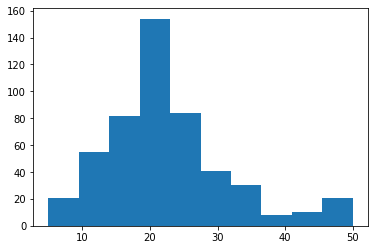

In [4]:
'''
1. plt의 hist
- 자세한 내용은 다음(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)을 확인.
- bins을 사용하여 구간을 구분할 수도 있음
'''
plt.hist(df['medv'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


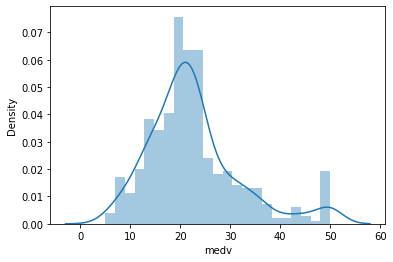

In [5]:
'''
2. sns의 distplot
- 자세한 내용은 다음(https://seaborn.pydata.org/generated/seaborn.distplot.html)에서 확인.
- kde: 커널 밀도 추정. 히스토그램을 매끄럽게 그린 것
- hist: 히스토그램
'''
sns.distplot(df['medv'])

- 선형 회귀의 가정을 만족하기 위해 scaling, normalization 등을 통해 변수의 분포를 변환할 수 있음  
  - 어떠한 가정을 만족할지에 따라 종속변수, 독립변수에 각각 다음과 같은 transformation을 적용할 수 있음: log, root, square 등 transformation  
    - 어느 방향으로 skewed 되었는지에 따라 적절한 transformation의 형태가 다름
  - 그러나 결과 해석에 어려움이 따를 수 있음

2. 막대그래프 (Bar Chart)
  - 범주형 데이터를 표현하는 차트나 그래프
  - `plt.bar` 또는 `sns.barplot`을 통해 시각화  

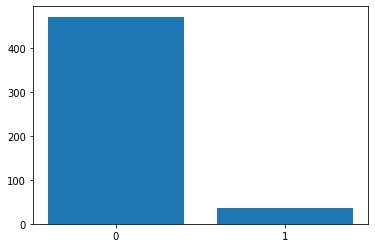

In [34]:
var = df.groupby('chas')['chas'].count()
plt.bar(var.index, var) 
plt.xticks([0, 1])
plt.show()

3. 산포도 (Scatter plot)
  - 데이터가 얼마나 그리고 어떻게 퍼져있나
  - 두 가지 축의 데이터(숫자로 구성된 두 벡터)를 필요로 함
     - 세 가지 이상의 정보를 표현하고 싶다면 점의 색상, 크기 등을 통해 나타낼 수 있음
  - `plt.scatter`과 `sns.scatterplot`을 통해 산포도를 시각화

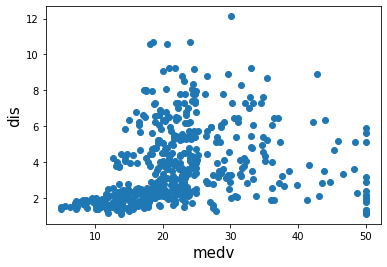

In [8]:
plt.scatter(df['medv'],df['dis']) 
plt.xlabel('medv', fontsize=15)
plt.ylabel('dis',fontsize=15)
plt.show()

4. 상자 그림 (Box plot)
  - 숫자로 구성된 벡터 하나를 필요로 함
  - 자료로부터 얻어낸 통계량인 5가지 요약 수치를 가지고 그림  
  - outlier를 파악할 때 도움이 됨
  - `plt.boxplot` 혹은 `sns.boxplot`을 사용하여 그림

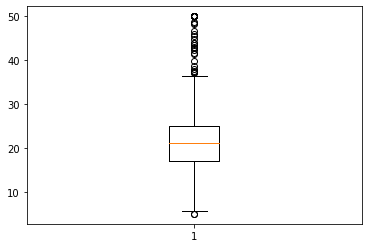

In [9]:
plt.boxplot(df['medv'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


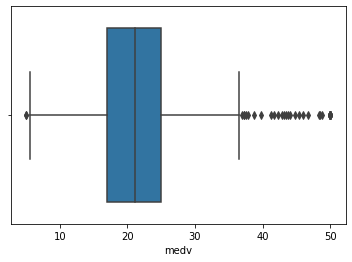

In [10]:
sns.boxplot(df['medv'])

- `medv`의 경우 outlier가 존재하는 것으로 보이므로 아래와 같이 outliers를 mean 값을 대체해줌
  - 기타 outlier를 제거하는 방식의 예시는 [여기](https://mkjjo.github.io/python/2019/01/10/outlier.html)해서 확인할 수 있음.

In [19]:
#replacing remaning outliers by mean
import numpy as np
q1, q3 = np.nanpercentile(df['medv'], [25,75])
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
df.loc[df['medv'] < lower_bound, 'medv'] = df['medv'].mean() # 보다 정확히 진행하기 위해서는 lower_bound보다 작은 값들을 제외한 값들의 평균을 사용하는 것을 권장
df.loc[df['medv'] > upper_bound, 'medv'] = 50 # 임의로 적절히 큰 값을 부여


- 이 외에도, 시계열 데이터를 나타낼 때는 라인그래프, 그룹별 집계를 표현할 때는 도넛 차트를 활용하는 등 데이터의 형태에 따라 EDA를 진행하는 방식이 달라질 것.
- 아래와 같이, 모든 수치형 변수 pair들에 대해 한 번에 산점도 분포를 확인할 수도 있음

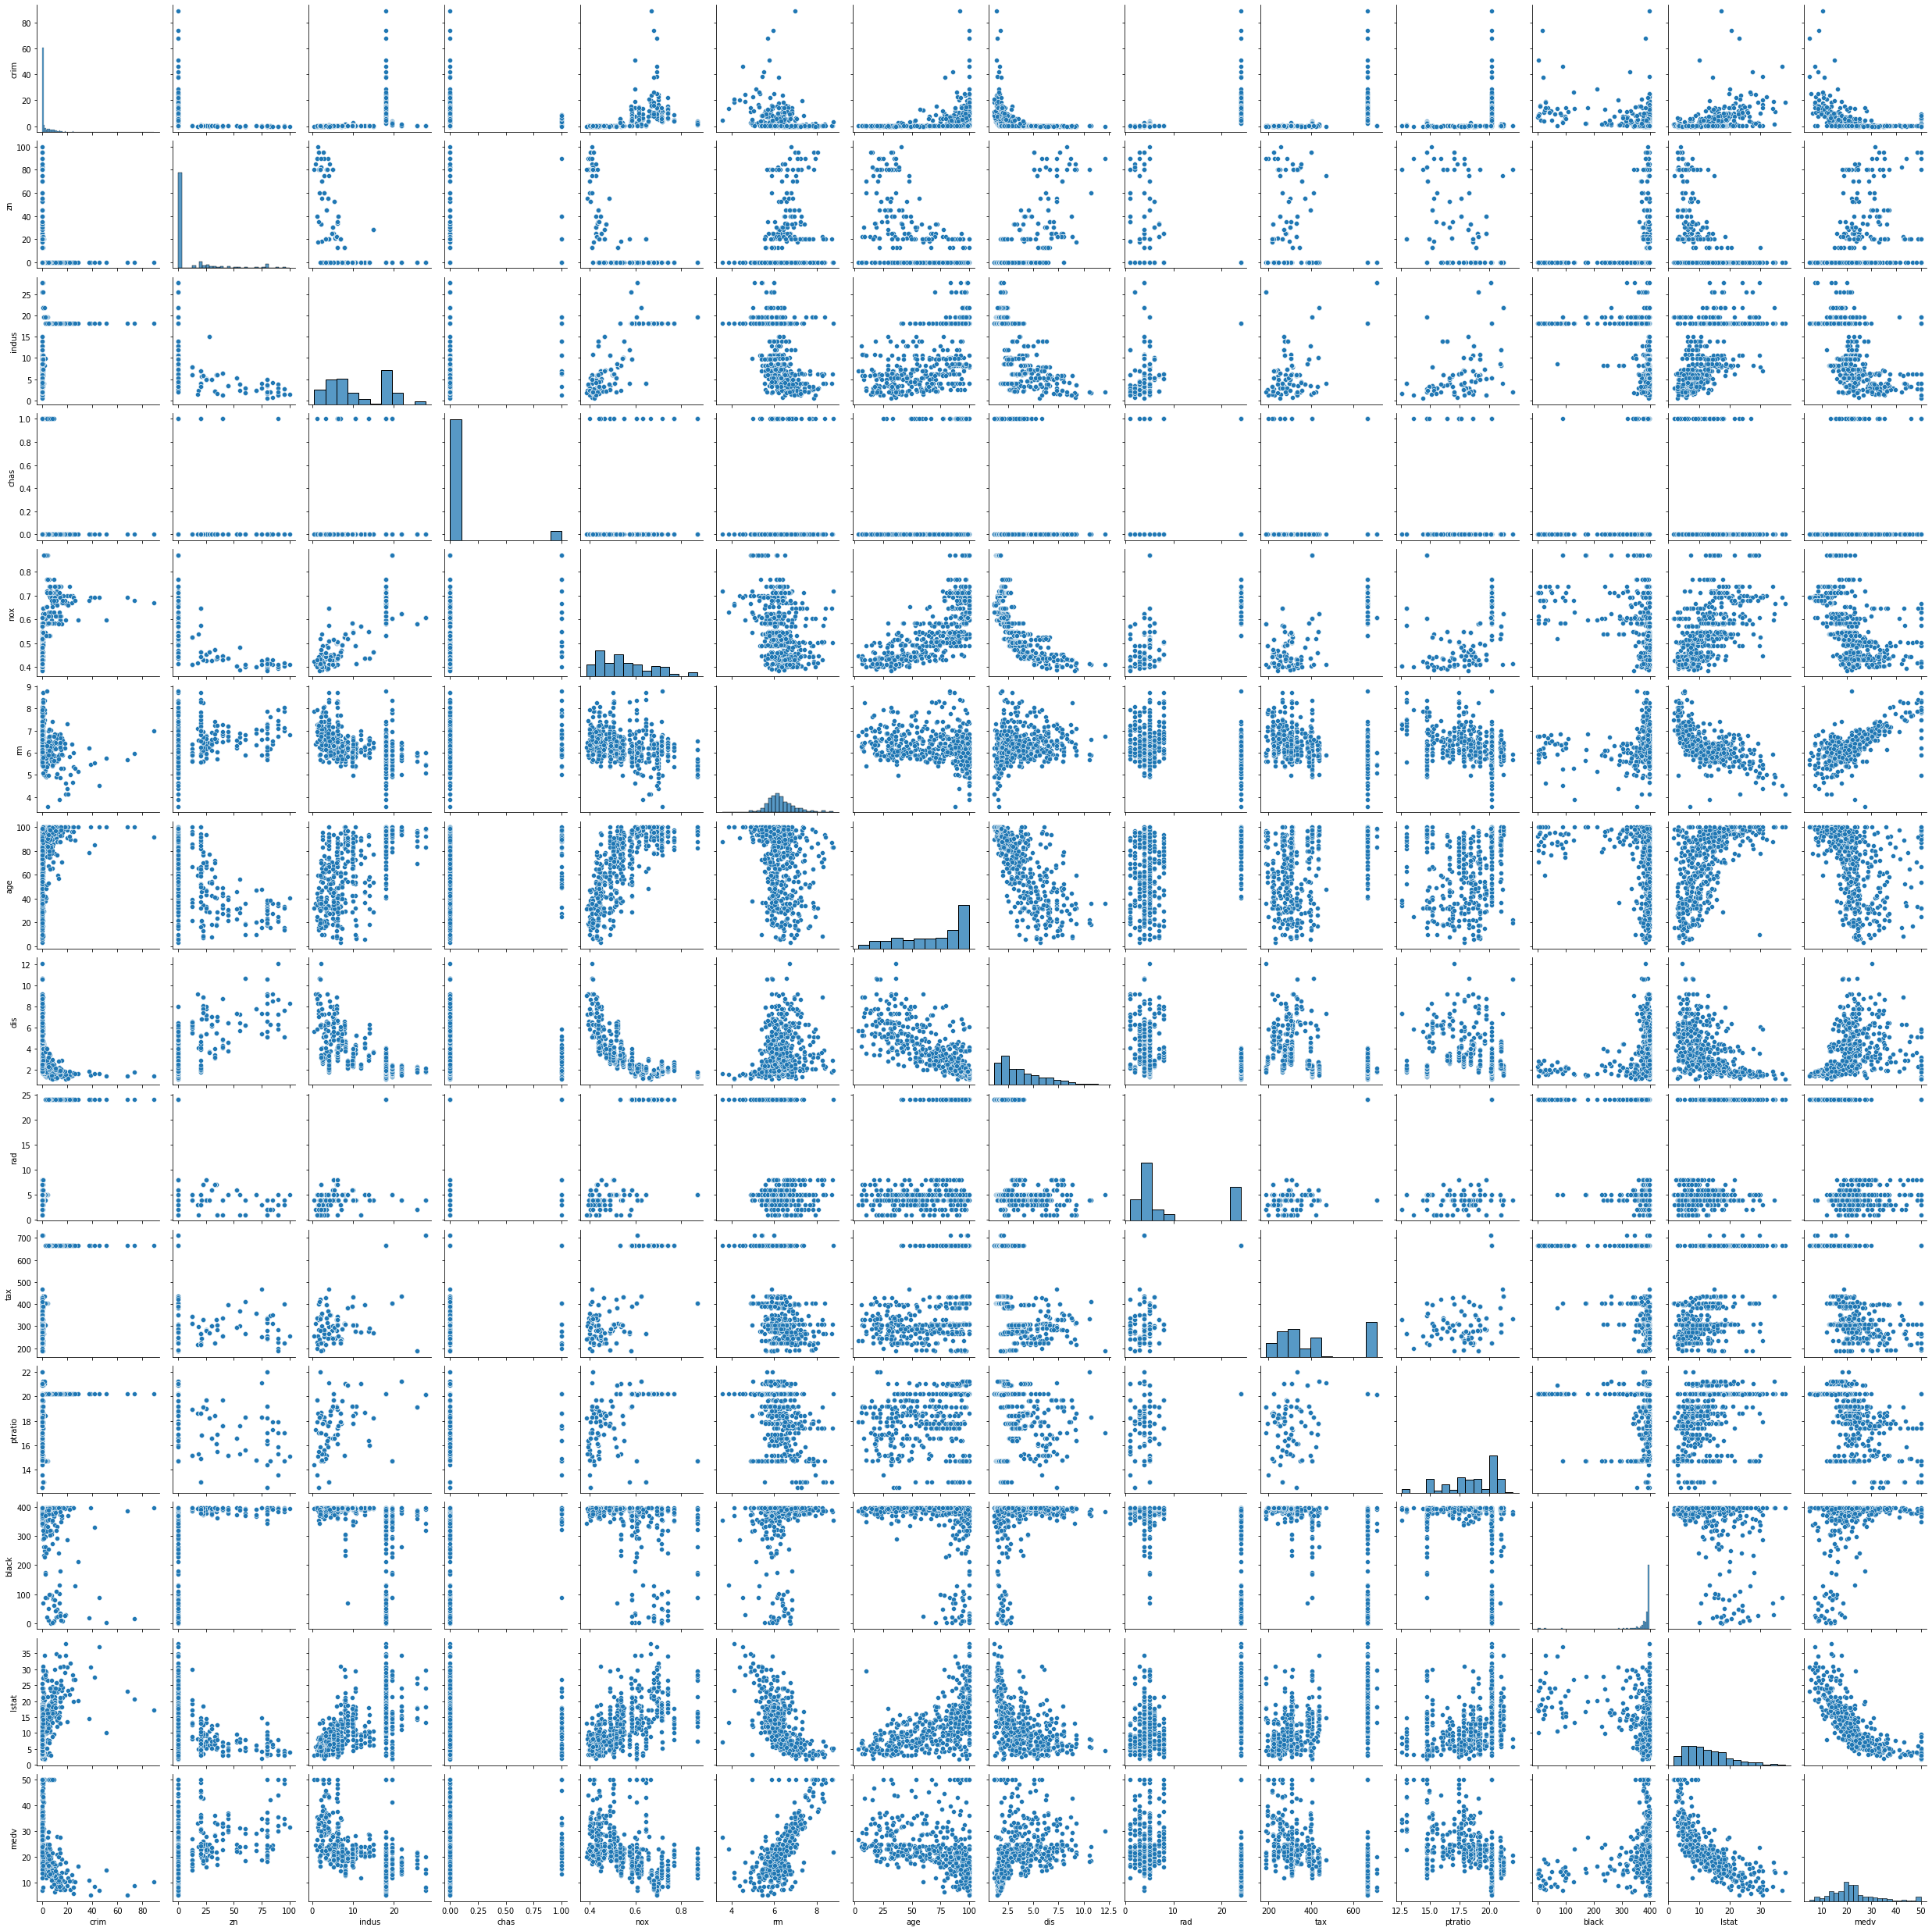

In [43]:
sns.pairplot(df)

- 많은 변수들의 histogram을 확인하였을 때 한 쪽으로 skew된 것을 확인할 수 있음
- Y와 X 간의 관계 역시 비선형적인 관계가 많다는 것을 확인하였음

## Step 3. 변수 간 상관관계 확인 (Pearson Correlation)

- 선형 회귀분석 시 독립변수들 간 다중공선성이 존재하면 회귀계수의 평균오차가 비정상적으로 커질 수 있음
- 이는 t값을 작아지게 만들어 p값이 유의하지 않게 하고, 유의해야할 변수가 유의하지 않다는 결과는 도출할 수 있음
- 다음과 같이 다중공선성을 일으키는 변수들을 사전 확인할 필요가 있음

### 1. Correlation 및 plot을 통해 확인

In [20]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.333195
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.345933
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.472769
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.155178
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.409282
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.699223
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.354280
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.228611
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.361532
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.449897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


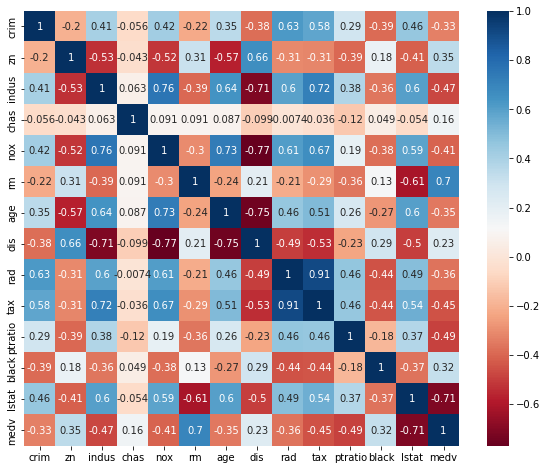

In [21]:
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap="RdBu",
            square=True, ax=ax)

### 2. VIF(Variance Inflation Factor; 분산팽창지수)로 확인
- VIF = $\frac{1}{tolerance}$ = $\frac{1}{1-R^2}$
- 일반적으로 VIF가 10보다 크면 문제가 있다고 판단, 더미변수의 VIF가 3 이상인 경우 다중공선성 의심 필요

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame([variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,:-1].shape[1])], index = df.iloc[:,:-1].columns)
vif.reset_index(inplace = True)
vif.columns = ['Feature', 'VIFscore']
vif

,Feature,VIFscore
0,crim,2.870893
1,zn,14.465549
2,indus,1.163245
3,chas,74.080908
4,nox,133.614383
5,rm,21.394261
6,age,15.355291
7,dis,14.276882
8,rad,61.896975
9,tax,87.569779


- 변수들 간 다중공선성이 의심되므로, 독립변수들을 정규화/scaling하거나, PCA 등을 통해 의존적인 변수들을 재조합하거나, 여러 독립변수들을 하나의 변수으로 묶어줄 수 있음.
- 본 실습에서는 향후 variable selection을 통해 해결하고자 함.
- 다중공선성이 있음에도 연구자의 의도와 변수의 유의성에 따라 제거할지 그대로 둘지 결정할 수 있음

- 더 자세한 내용은 [여기](https://ysyblog.tistory.com/171)를 참고

# 1) Linear Regression

## Step 1. Train Test data split
- `sklearn`의 `train_test_split` 함수를 사용하여 데이터셋 split
  - Y가 범주형일 경우 stratify를 적용하여, y의 비율에 따라 split할 수 있음 (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [24]:
# Train: Test = 8:2 분리
from sklearn.model_selection import train_test_split
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df[["medv"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=312)

## Step 2. Regression

1. `statsmodels.formula.api`의 `ols`를 사용하여 선형 회귀분석 진행  
i) X, Y 변수를 하나의 데이터프레임에 통합  
ii) X와 Y 변수를 각각의 데이터프레임으로 분리  

2. `sklearn.linear_model`의 `LinearRegression`를 사용하여 진행

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

### 1. 단순 선형회귀
- 하나의 x, 하나의 y로 구성

** 다른 데이터셋으로 진행

In [ ]:
cars = pd.read_csv("https://raw.githubusercontent.com/jej0312/DM_TA/main/data/cars.csv", header=0)

In [ ]:
'''
ols('종속변수 ~ 독립변수1 + 독립변수2 + , ...', data=df).fit()의 형태로 작성
'''
fit = ols('dist ~ speed', data=cars).fit()

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.49e-12
Time:                        01:40:43   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# print(fit.params.Intercept) ## 절편
print(fit.params) ## 기울기

Intercept   -17.579095
speed         3.932409
dtype: float64


- dist = -17.5791 + 3.9324 * speed

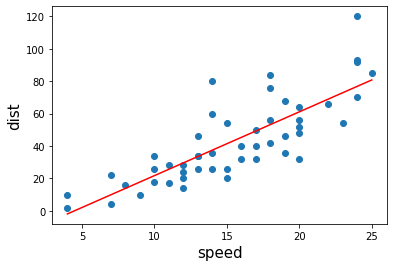

In [ ]:
# 시각화
# fig = plt.figure(figsize=(8,8))
# fig.set_facecolor('white')
 
plt.scatter(cars['speed'],cars['dist']) ## 원 데이터 산포도 (x,y)
plt.plot(cars['speed'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('speed', fontsize=15)
plt.ylabel('dist',fontsize=15)
plt.show()

- sklearn을 활용할 경우 다음과 같이 진행

In [ ]:
X = cars['speed']
y = cars['dist']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y) # X는 2차원 array 형태여야 하기 때문에 reshape(-1,1) 진행

LinearRegression()

In [ ]:
line_fitter.coef_ #기울기값

array([3.93240876])

In [ ]:
line_fitter.intercept_ #절편

-17.579094890510973

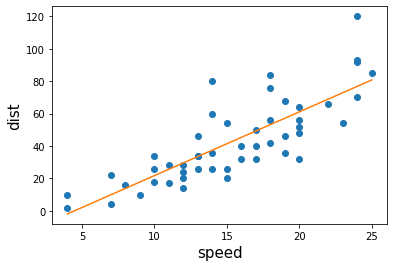

In [ ]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.xlabel('speed', fontsize=15)
plt.ylabel('dist',fontsize=15)
plt.show()

### 2. 다중 선형회귀

#### `ols` 사용 시
- 상수항은 `add_constant`를 통해 추가해주어야 함

In [26]:
x_train_ = sm.add_constant(x_train, has_constant='add') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
x_train_.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
51,1.0,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243.0,16.8,393.97,9.43
304,1.0,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222.0,18.4,393.68,6.93
174,1.0,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296.0,16.6,393.23,9.64
437,1.0,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666.0,20.2,9.32,26.45
11,1.0,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27


In [28]:
df_ = pd.concat([x_train_, y_train], axis=1)
df_.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
51,1.0,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243.0,16.8,393.97,9.43,20.5
304,1.0,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222.0,18.4,393.68,6.93,36.1
174,1.0,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296.0,16.6,393.23,9.64,22.6
437,1.0,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666.0,20.2,9.32,26.45,8.7
11,1.0,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


In [34]:
'''
- 종속변수를 제외한 기타 변수들이 다 독립변수일 경우, ols.from_formula("종속변수 ~ " + "+".join(종송변수 칼럼명 리스트), data=df)로도 한 번에 표현 가능
- 범주형 변수의 경우 앞에 C를 붙여 사용 (e.g. 독립변수1 -> C(독립변수1))
'''
feature_names = x_train.columns
print("medv~" + "+".join(feature_names).replace('chas', 'C(chas)'))
fit = ols("medv~" + "+".join(feature_names).replace('chas', 'C(chas)'), data=df_).fit()
fit.summary()

medv~crim+zn+indus+C(chas)+nox+rm+age+dis+rad+tax+ptratio+black+lstat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.10
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.84e-94
Time:                        07:17:08   Log-Likelihood:                -1257.2
No. Observations:                 404   AIC:                             2542.
Df Residuals:                     390   BIC:                             2598.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.0599      6.593      5.773      0.000      25.099      51.021
C(chas)[T.1]     2.2898      1.106      2.071      0.039       0.116       4.464
crim            -0.0937      0.044     -2.151      0.032      -0.179      -0.008
zn               0.0451      0.018      2.524      0.012       0.010       0.080
indus           -0.0006      0.079     -0.007      0.994      -0.156       0.155
nox            -21.3896      5.133     -4.167      0.000     -31.481     -11.298
rm               4.1468      0.529      7.832      0.000       3.106       5.188
age              0.0206      0.017      1.218      0.224      -0.013       0.054
dis             -1.6579      0.265     -6.264      0.000      -2.178      -1.138
rad              0.3602      0.093      3.868      0.000       0.177       0.543
tax             -0.0160      0.005     -3.013      0.003      -0.026      -0.006
ptratio         -0.9517      0.168     -5.649      0.000      -1.283      -0.620
black            0.0088      0.004      2.506      0.013       0.002       0.016
lstat           -0.5776      0.064     -8.971      0.000      -0.704      -0.451
==============================================================================
Omnibus:                      127.862   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.221
Skew:                           1.482   Prob(JB):                     3.32e-82
Kurtosis:                       6.675   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
fit.params

Intercept       38.059877
C(chas)[T.1]     2.289755
crim            -0.093683
zn               0.045109
indus           -0.000577
nox            -21.389561
rm               4.146757
age              0.020645
dis             -1.657901
rad              0.360210
tax             -0.016009
ptratio         -0.951737
black            0.008832
lstat           -0.577553
dtype: float64

#### 모형 검정
- R-squared: 결정계수. 회귀직선에 의하여 설명되는 변동이 총 변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인 (1에 가까울수록 설명력이 높음) 
- **Adj. R-squared**: 모델에 도움이 되는 데이터에 따라 조정된 결정계수 
- **F-statistics**: 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 (0에 가까울수록 적절)
- prob(F-statistics): 회귀식이 유의미한지 (일반적으로 0.05보다 작을 때 변수들끼리 관련이 있다고 판단)
- AIC: 표본 개수와 모델의 복잡성을 기반으로 평가 (값이 작을수록 좋음)
- BIC: AIC에 패널티를 부여한 평가 성능으로, AIC보다 성능이 좋음 (작을수록 좋음)
---
- **p-value**: 각 독립 변수가 종속변수에 미치는 영향이 유의한지. 일반적으로 0.05보다 작을 때 유의하다고 판단
  - 각 변수들의 계수: 각 독립변수들의 변화가 종속변수에 얼마나/어떤 영향을 주는가 (pos, neg)
- Omnibus: 디아고스티노 검정으로, 정규성 테스트 값; 값이 클수록 정규성을 따름
- skew: 평균 주위의 잔차들이 대칭하는지 (0에 가까울 수록 대칭)
- kurtosis: 잔차들의 분포 모양으로, 3에 가까울수록 정규분포
- Durbin-Watson: 더빈왓슨 정규성 검정으로, 잔차의 독립성 여부를 판단함; 1.5~2.5 사이일 때 잔차가 독립적, 0이나 4에 가까울수록 자기상관을 가진다고 판단)
- Cond. No: 독립변수 간 다중공선성 검정; 10 이상일 경우 다중공선성이 있다고 판단
  - `[2] The condition number is large, 1.5e+04. This might indicate that there are strong multicollinearity or other numerical problems.`

- 더 자세한 내용은 [여기1](https://ordo.tistory.com/103)와 [여기2](https://ysyblog.tistory.com/119)를 참고

In [43]:
feature_names_ = ["scale("+feature+")" for feature in feature_names if not feature == 'chas'] + ['chas']
print(feature_names_)
fit = ols("medv~" + "+".join(feature_names_).replace('chas', 'C(chas)'), data=df_).fit()
fit.summary()

['scale(crim)', 'scale(zn)', 'scale(indus)', 'scale(nox)', 'scale(rm)', 'scale(age)', 'scale(dis)', 'scale(rad)', 'scale(tax)', 'scale(ptratio)', 'scale(black)', 'scale(lstat)', 'chas']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.10
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.84e-94
Time:                        07:20:59   Log-Likelihood:                -1257.2
No. Observations:                 404   AIC:                             2542.
Df Residuals:                     390   BIC:                             2598.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.8167      0.286     79.659      0.000      22.254      23.380
C(chas)[T.1]       2.2898      1.106      2.071      0.039       0.116       4.464
scale(crim)       -0.8004      0.372     -2.151      0.032      -1.532      -0.069
scale(zn)          1.0518      0.417      2.524      0.012       0.233       1.871
scale(indus)      -0.0039      0.539     -0.007      0.994      -1.063       1.055
scale(nox)        -2.4083      0.578     -4.167      0.000      -3.545      -1.272
scale(rm)          2.9349      0.375      7.832      0.000       2.198       3.672
scale(age)         0.5733      0.471      1.218      0.224      -0.352       1.499
scale(dis)        -3.4318      0.548     -6.264      0.000      -4.509      -2.355
scale(rad)         3.1182      0.806      3.868      0.000       1.533       4.703
scale(tax)        -2.6831      0.890     -3.013      0.003      -4.434      -0.933
scale(ptratio)    -2.0675      0.366     -5.649      0.000      -2.787      -1.348
scale(black)       0.7989      0.319      2.506      0.013       0.172       1.426
scale(lstat)      -4.1320      0.461     -8.971      0.000      -5.037      -3.226
==============================================================================
Omnibus:                      127.862   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.221
Skew:                           1.482   Prob(JB):                     3.32e-82
Kurtosis:                       6.675   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 다중공선성이 해결된 것을 확인할 수 있음
- F-statistics가 71.1, p-value는 2.84e-94로 통계적으로 유의
- Adj. R-squared가 0.693으로, 전체의 69% 정도를 설명하고 있음 (모형이 데이터에 대해 가지는 설명력)
- p-value: `scale(indus)`와 `scale(age)`를 제외하고 모든 변수가 통계적으로 유의미함 (Y를 X들이 설명할 수 있음)

#### `LinearRegression` 사용 시

In [44]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [45]:
pd.DataFrame(zip(x_train.columns, mlr.coef_[0]), columns = ['feature', 'coefficients'])

,feature,coefficients
0,crim,-0.093683
1,zn,0.045109
2,indus,-0.000577
3,chas,2.289755
4,nox,-21.389561
5,rm,4.146757
6,age,0.020645
7,dis,-1.657901
8,rad,0.360210
9,tax,-0.016009


In [46]:
print(mlr.intercept_) #절편

[38.05987677]


## Step 3. Evaluation
- MSE (Mean Squared Error): $\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$
  - 추정된 값과 실제 값 간의 평균 제곱 차이

In [47]:
y_predict = fit.predict(x_test) # y 예측값 저장

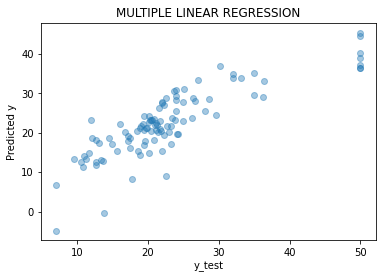

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [57]:
y_test.iloc[:,0] - y_predict

360    2.106398
358    1.083087
483    1.252786
45    -2.884016
330   -1.296947
         ...   
331   -2.112155
270   -1.447614
456    0.150187
84    -1.578033
391    6.153057
Length: 102, dtype: float64

In [59]:
# MSE = Mean Squared Error 구하기
## 방법1
import numpy as np
def MSE(y, pred):
    return np.mean(np.square(y.iloc[:,0] - pred))
print(MSE(y_test, y_predict))

## 방법2
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(mse)

26.150623852619155
26.150623852619145


In [60]:
# RMSE = Root Mean Squared Error 구하기
## 방법1
def RMSE(y, pred):
    return np.sqrt(np.mean(np.square(y.iloc[:,0] - pred)))
print(RMSE(y_test, y_predict))

## 방법2
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

5.113768067933777
5.113768067933776


In [62]:
y_predict = mlr.predict(x_test) # y 예측값 저장
mse = mean_squared_error(y_test, y_predict)
print('MSE:', mse)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE:', rmse)

MSE: 26.15062385261946
RMSE: 5.113768067933807


# 2) 변수선택법 Variable Selection

In [74]:
# Forward Selection 전진 선택법
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature_names) > 0:
    remainder = list(set(feature_names) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y_train,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train,sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
selected_variables

['lstat', 'rm', 'ptratio', 'dis', 'nox', 'black', 'chas']

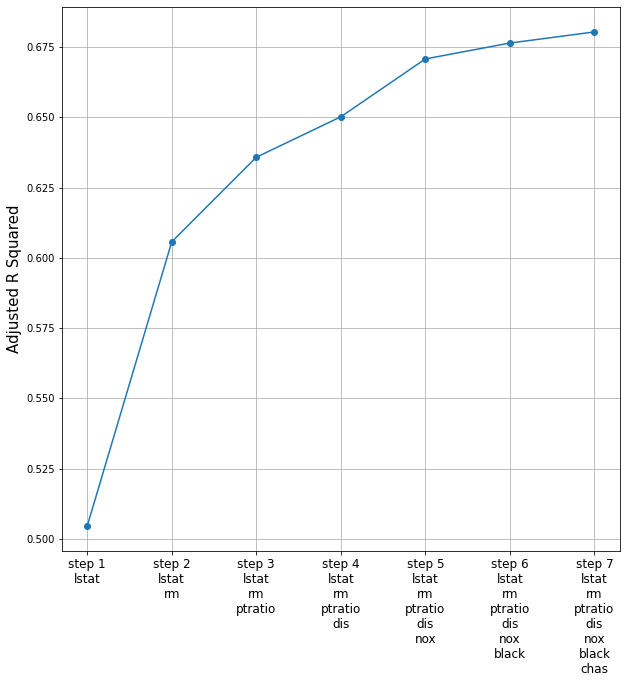

In [76]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [77]:
from statsmodels.formula.api import ols
res = ols('medv~'+'+'.join(selected_variables), data=df_).fit()
#종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.71e-95
Time:                        07:47:41   Log-Likelihood:                -1268.6
No. Observations:                 404   AIC:                             2553.
Df Residuals:                     396   BIC:                             2585.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8351      6.280      4.910      0.000      18.488      43.182
lstat         -0.5595      0.061     -9.225      0.000      -0.679      -0.440
rm             4.8002      0.510      9.408      0.000       3.797       5.803
ptratio       -0.9717      0.145     -6.699      0.000      -1.257      -0.687
dis           -1.3869      0.219     -6.340      0.000      -1.817      -0.957
nox          -20.3347      4.393     -4.628      0.000     -28.972     -11.697
black          0.0093      0.003      2.706      0.007       0.003       0.016
chas           2.7111      1.114      2.433      0.015       0.520       4.902
==============================================================================
Omnibus:                      135.932   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.521
Skew:                           1.535   Prob(JB):                     1.33e-96
Kurtosis:                       7.099   Cond. No.                     9.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Backward Elimination 후진 소거법
selected_variables = list(feature_names) ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(x_train[selected_variables])
    p_vals = sm.OLS(y_train, X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train, sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


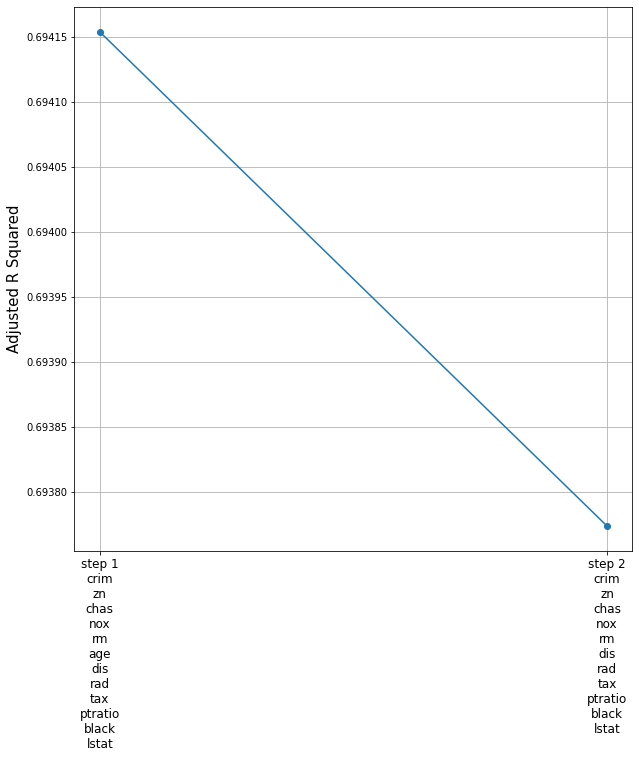

In [91]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [95]:
from statsmodels.formula.api import ols
res = ols('medv~'+'+'.join(selected_variables), data=df_).fit() #종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     84.00
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           7.00e-96
Time:                        08:11:05   Log-Likelihood:                -1257.9
No. Observations:                 404   AIC:                             2540.
Df Residuals:                     392   BIC:                             2588.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.5115      6.556      5.722      0.000      24.623      50.400
crim          -0.0935      0.044     -2.150      0.032      -0.179      -0.008
zn             0.0419      0.018      2.379      0.018       0.007       0.077
chas           2.3391      1.098      2.131      0.034       0.181       4.497
nox          -19.9148      4.820     -4.132      0.000     -29.391     -10.439
rm             4.2846      0.514      8.329      0.000       3.273       5.296
dis           -1.7410      0.250     -6.965      0.000      -2.233      -1.250
rad            0.3549      0.089      3.971      0.000       0.179       0.531
tax           -0.0159      0.005     -3.279      0.001      -0.025      -0.006
ptratio       -0.9421      0.166     -5.662      0.000      -1.269      -0.615
black          0.0091      0.004      2.596      0.010       0.002       0.016
lstat         -0.5504      0.060     -9.165      0.000      -0.668      -0.432
==============================================================================
Omnibus:                      131.926   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.137
Skew:                           1.516   Prob(JB):                     7.84e-88
Kurtosis:                       6.826   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# Stepwise Selection 단계별 선택법
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature_names) > 0:
    remainder = list(set(feature_names) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y_train,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = x_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y_train,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train,sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


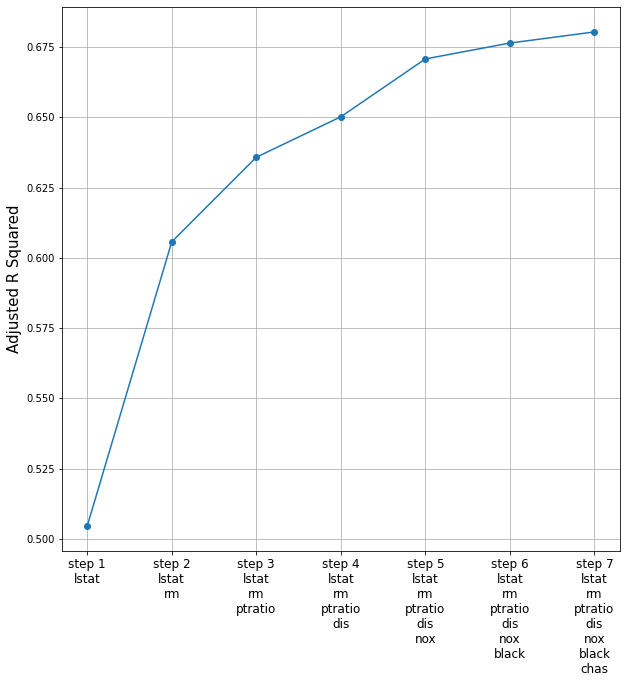

In [98]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [99]:
from statsmodels.formula.api import ols
res = ols('medv~'+'+'.join(selected_variables), data=df_).fit() #종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.71e-95
Time:                        08:12:38   Log-Likelihood:                -1268.6
No. Observations:                 404   AIC:                             2553.
Df Residuals:                     396   BIC:                             2585.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8351      6.280      4.910      0.000      18.488      43.182
lstat         -0.5595      0.061     -9.225      0.000      -0.679      -0.440
rm             4.8002      0.510      9.408      0.000       3.797       5.803
ptratio       -0.9717      0.145     -6.699      0.000      -1.257      -0.687
dis           -1.3869      0.219     -6.340      0.000      -1.817      -0.957
nox          -20.3347      4.393     -4.628      0.000     -28.972     -11.697
black          0.0093      0.003      2.706      0.007       0.003       0.016
chas           2.7111      1.114      2.433      0.015       0.520       4.902
==============================================================================
Omnibus:                      135.932   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.521
Skew:                           1.535   Prob(JB):                     1.33e-96
Kurtosis:                       7.099   Cond. No.                     9.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3) Ridge, LASSO
- 다중 선형 회귀 모델 사용 시 과적합 (overfitting) 발생 가능하다는 단점을 보완, 범용성 부여를 위해 제약 조건을 부여
  - MSE를 줄이기 위해서는 Bias와 Variance를 모두 줄이는 것이 좋으나 trade-off 관계가 있음
  - 정답을 예측하기 위해 복잡한 모델을 설정할 경우 train data만 잘 맞추는, variance가 큰 모델이 생성될 수 있으므로 과적합 발생, test data에서 잘못 예측할 가능성 증가
  - 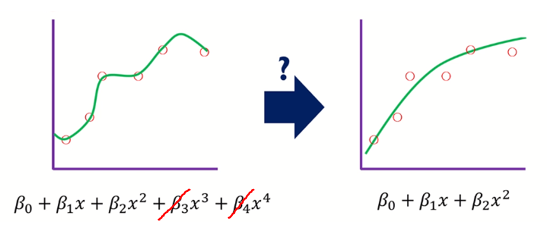
- Lasso: 가중치들의 절댓값의 합(L1-norm)이 최소가 되도록 설정
  - 특정 가중치들이 0이 되면 해당 변수를 사용하지 않게 됨
  - $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^+\alpha \sum_{j=1}^m|w_j|$
- Ridge: L2-norm을 사용
  - $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^+\alpha \sum_{j=1}^m w_j^2$
- 자세한 설명은 [여기1](https://otugi.tistory.com/127), [여기2](https://sanghyu.tistory.com/13)를 참고

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

In [108]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
linear_y_hat = model.predict(x_test)

ridge_alpha = 1
ridge = Ridge(alpha = ridge_alpha)
ridge.fit(x_train,y_train)
ridge_y_hat = ridge.predict(x_test)

lasso_alpha = 0.1
lasso = Lasso(alpha = lasso_alpha)
lasso.fit(x_train,y_train)
lasso_y_hat = lasso.predict(x_test)

In [109]:
from sklearn.metrics import r2_score

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))

R2 score - Linear: 0.71, Ridge: 0.72, Lasso: 0.71
MSE - Linear: 26.15, Ridge: 25.73, Lasso: 26.64
MAE - Linear: 3.86, Ridge: 3.77, Lasso: 3.87


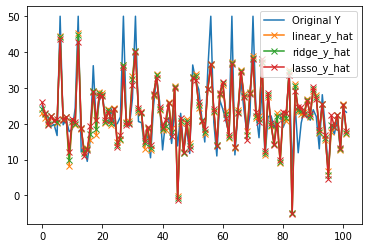

In [110]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

In [111]:
# Let's predict

ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(x_train,y_train)
  lasso.fit(x_train,y_train)

  ridge_y_hat = ridge.predict(x_test)
  lasso_y_hat = lasso.predict(x_test)

  ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
  ridge_result.append(ridge_r2)
  lasso_result.append(lasso_r2)

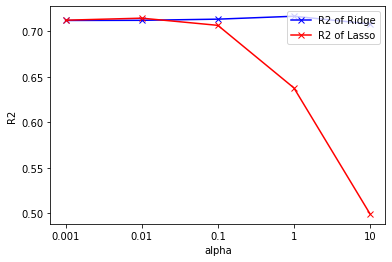

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5), ridge_result, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(5), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()

# 4) 카이제곱 검정 Chi-squared test
- 관찰된 빈도가 기대되는 빈도와 의미있게 다른지 검정: 자료가 빈도의 형태로 주어진 경우 (범주형)
- 검정 유형:
  - 동질성 검정 (test of homogeneity): 두 개 이상의 범주형 자료가 동일한 분포를 갖는 모집단에서 추출된 것인지 (e.g.  남학생과 여학생의 물리학, 화학, 생물학에 대한 선호도가 같은가 다른가)
    - H0: 남학생과 여학생의 과목별 선호도는 동일한 분포를 보인다.
    - H1: 남학생과 여학생의 과목별 선호도는 서로 다른 분포를 보인다.
  - **독립성 검정** (test of independent): 변인이 두 개 이상일 때 사용되며, 기대빈도는 '두 변인이 서로 상관이 없고 독립적'이라고 기대하는 것을 의미하며 관찰빈도와의 차이를 통해 기대빈도의 진위여부를 밝힘 (e.g. 학년이 특정 개인의 대면/비대면 선호도에 영향을 끼치는지)
    - H0: 행과 열의 자료들은 서로 독립적으로 분포되어 있다.
    - H1: 행과 열의 자료들을 서로 무관하지 않고 상호 관련되어 있다.

In [114]:
import pandas as pd
df = pd.DataFrame({'Work_ex_Y': [64, 84], 'Work_ex_N': [10, 57]}, index=['Hire_Y', 'Hire_N']) # 일 경험과 취직률 간의 관계
df

,Work_ex_Y,Work_ex_N
Hire_Y,64,10
Hire_N,84,57


In [117]:
import scipy.stats
chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(df)

In [120]:
print('카이제곱 검정통계량: {}'.format(chi2))
print('자유도: {}'.format(dof))
print('p-value: {}'.format(pvalue))

카이제곱 검정통계량: 15.154425347637424
자유도: 1
p-value: 9.906584720516475e-05


- 일을 해본 경험과 졸업 후 고용되는 것이 독립이 아님(χ^2(1) = 15.15, p < 0.05)

# Appendix: Scaling
- `sklearn` 모듈에서 제공하는 scaler은 4가지가 있음
  - Standard scaler: 기존 변수의 범위를 표준 정규 분포로 변환 (평균: 0, 분산: 1), 데이터의 최대 최소를 모를 때 사용, 이상치에 민감
  - Minmax scaler: 변수의 범위를 0~1 사이의 값으로 변환, 데이터가 bell-shape가 아니거나 표준 편차가 작을 때 효과적, 이상치에 민감
  - Robust scaler: 평균과 분산이 아닌 중위수(median)이나 사분위수(IQR)을 사용, 이상치의 영향이 적어짐
  - Normalizer: 원점으로부터 1씩 떨어져있는 범위 내로 변환, 학습이 빨라지며 과적합을 방지
- 자세한 설명은 [여기](https://mingtory.tistory.com/m/140)를 참고

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()

In [ ]:
X_train_std = standard_scaler.fit_transform(x_train)
X_test_std = standard_scaler.transform(x_test)